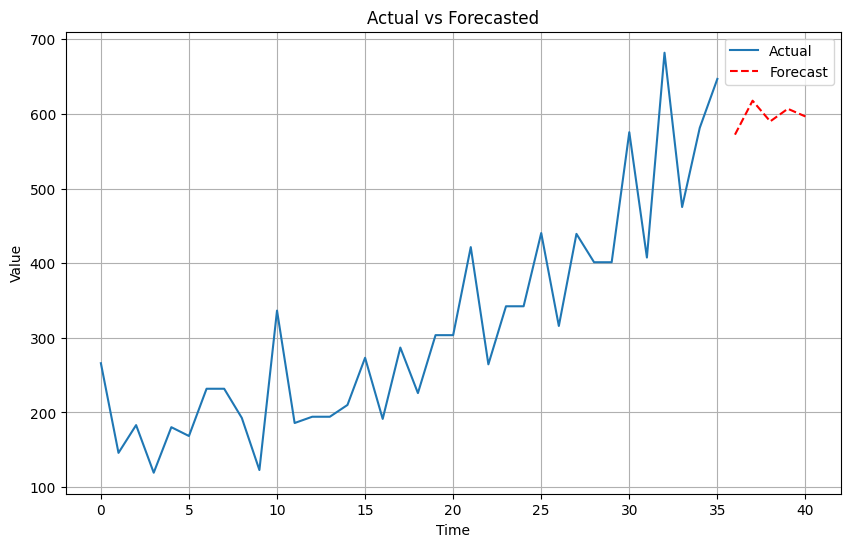

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 1. Load the dataset
df = pd.read_csv('Dataset.csv')

# Keep only the numeric columns
df = df.select_dtypes(include='number')

# Pick the first numeric column
series = df.iloc[:, 0]

# Fill missing values
series = series.ffill()

# 2. Fit ARIMA model
model = ARIMA(series, order=(1,1,1))  # (p,d,q) simple example
model_fitted = model.fit()

# 3. Forecast
n_steps = 5  # predict next 5 points
forecast = model_fitted.forecast(steps=n_steps)

# 4. Plot actual and forecast
plt.figure(figsize=(10,6))
plt.plot(series, label='Actual')
plt.plot(range(len(series), len(series)+n_steps), forecast, '--', label='Forecast', color='red')
plt.title('Actual vs Forecasted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()
